### Python example to work towards 

Parameters:
- Average: True, False
- L1 Ratio: uniform distribution from 0 to 1
- Alpha: loguniform distribution from 0.0001 to 1.0

Iterations: 20

CV: 5

### Max samples for 0.95 success rate

$1-(1-0.05)^n>0.95$

$n>59$

### Hyper parameter generation

In [1]:
// generate n parameters for search
/* sz  = number of parameters to generate
/* lo = minimum possible value, can be `(::)` for numbers between 0 and hi, booleans or symbols
/* hi = maximum possible value or list of symbols to choose from
/* lg = boolean indicating if values should be pulled from a log uniform distribution
/--- need to do neg[n]?
random_hp_gen:{[sz;lo;hi;lg]
  // why can't I do if[lg;exp]? --used for log uniform variables
  $[lg;exp;]$[lo~(::);
              // if boolean or symbols
              sz?hi;
              // numerical range
              lo+sz?hi-lo]}

// example
`average`l1_ratio`alpha!random_hp_gen[60].'((::;0b;0b);(0.;1.;0b);(.0001;1.;1b))

average | 0         1         1         0         0         1         0      ..
l1_ratio| 0.5294808 0.6916099 0.2296615 0.6919531 0.4707883 0.6346716 0.96723..
alpha   | 1.901747  1.791526  1.153245  2.496767  2.467202  2.170704  1.47262..


In [2]:
low:0.0001
high:1.
size:100

// options suggested for how to select random variables from log-uniform dist
// https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
(min;max)@\:random_hp_gen[size;low;high;1b]
(min;max)@\:exp .p.import[`numpy.random][`:uniform][low;high;size]`
(min;max)@\:.p.import[`scipy.stats][`:reciprocal][exp low;exp high][`:rvs][size]`

// how currently done in examples of random
(min;max)@\:.p.import[`scipy.stats][`:loguniform][`:rvs][.01;1.;`size pykw 1000]`

1.009152 2.717217


1.015275 2.670473


1.001698 2.686487


0.01000503 0.9926465


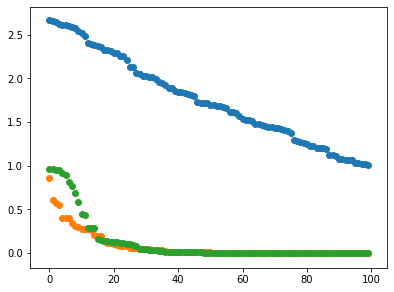

In [3]:
// comparison of different methods
plt:.p.import`matplotlib.pyplot
plt[`:scatter][til 100;desc exp .0001+100?1.-.0001];
plt[`:scatter][til 100;desc .p.import[`scipy.stats][`:loguniform][.0001;1.][`:rvs][100]`];
plt[`:scatter][til 100;desc .p.import[`scipy.stats][`:reciprocal][.0001;1.][`:rvs][100]`];
plt[`:show][];

In [4]:
// q loguniform
loguniform:{[low;high;size]exp low+size?high-low}

In [5]:
// checks - a>0 and b>a --function should have these somewhere?

---